# This Jupyter Notebook is to reproduce the Pie Chart provided in SOBR report. The input files are from output generated from the original SOBR Trend analysis Jupyter Notebook.

In [1]:
import SOBRTablefig as st
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.colors


In [2]:
import pandas as pd
import os

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df[['Station', 'Latitude', 'Longitude', 'Trend Direction', 'Trend Significance', 'Slope as % of MAF','Trend SignificancePtt']]

def load_datatime(file_path):
    df = pd.read_csv(file_path)
    df = df[['Station', 'Latitude', 'Longitude', 'Trend Direction', 'Trend Significance', 'slope over CNP','Trend SignificancePtt']]
    df.rename(columns={'slope over CNP': 'Slope as % of MAF'}, inplace=True)
    return df

def calculate_trend_statisticsallstation(dfs):

    # Define a function to calculate count and percentage
    def calculate_count_and_percentage(df, direction, significance):
        if significance == "Unlikely":
            count = df[df['Trend Significance'] == significance].shape[0]
        else:
            count = df[(df['Trend Direction'] == direction) & (df['Trend Significance'] == significance)].shape[0]
        percentage = (count / len(df)) * 100
        return count, percentage

    # Calculate and print count, percentage, and total number of entries for each category in each DataFrame
    categories = ['Highly Likely', 'Very Likely', 'Likely', 'Unlikely']
    directions = ['Increasing', 'Decreasing']
#     categories = ['Highly Likely', 'Very Likely', 'Likely', 'Unlikely']
    for i, df in enumerate(dfs, start=1):
        total_entries = len(df)
        print(f"Results for result_df{i} (Total Entries: {total_entries}):")
        for category in categories:
            if category == 'Unlikely':
                count, percentage = calculate_count_and_percentage(df, None, category)
                print(f'{category}: Count={count}, Percentage={percentage:.2f}%')
            else:
                for direction in directions:
                    count, percentage = calculate_count_and_percentage(df, direction, category)
                    print(f'{category} ({direction}): Count={count}, Percentage={percentage:.2f}%')
        print()


def calculate_trend_statistics(dfs):
    station_sets = [set(df['Station']) for df in dfs]
    common_stations = set.intersection(*station_sets)
    filtered_dfs = [df[df['Station'].isin(common_stations)] for df in dfs]

    def calculate_count_and_percentage(df, direction, significance):
        if significance == "Unlikely":
            count = df[df['Trend Significance'] == significance].shape[0]
        else:
            count = df[(df['Trend Direction'] == direction) & (df['Trend Significance'] == significance)].shape[0]
        percentage = (count / len(df)) * 100
        return count, percentage

    result_data = []
    categories = ['Highly Likely', 'Very Likely', 'Likely', 'Unlikely']
    directions = ['Increasing', 'Decreasing']
    for i, df in enumerate(filtered_dfs, start=1):
        total_entries = len(df)
        for category in categories:
            if category == 'Unlikely':
                count, percentage = calculate_count_and_percentage(df, None, category)
                result_data.append((f'result_df{i}', total_entries, category, '', count, percentage))
            else:
                for direction in directions:
                    count, percentage = calculate_count_and_percentage(df, direction, category)
                    result_data.append((f'result_df{i}', total_entries, category, direction, count, percentage))

    result_df = pd.DataFrame(result_data, columns=['DataFrame', 'Total Entries', 'Category', 'Direction', 'Count', 'Percentage'])
    return result_df

def load_files(file_paths):
    dfs = []
    for file_path in file_paths:
        if 'Time' in file_path:
            dfs.append(load_datatime(file_path))
        else:
            dfs.append(load_data(file_path))
    return dfs

def format_results_for_saving(result_df):
    columns = ['Significance and Trend Direction', 'CNP70', 'CNP80', 'CNP90', 'POR2020']
    formatted_data = []

    categories = ['Highly Likely', 'Very Likely', 'Likely', 'Unlikely']
    directions = ['Increasing', 'Decreasing']

    for category in categories:
        if category == 'Unlikely':
            row = [f'{category}']
            for i in range(4):
                row.append(result_df[(result_df['Category'] == category) & (result_df['DataFrame'] == f'result_df{i+1}')]['Percentage'].values[0])
            formatted_data.append(row)
        else:
            for direction in directions:
                row = [f'{category} ({direction})']
                for i in range(4):
                    row.append(result_df[(result_df['Category'] == category) & (result_df['Direction'] == direction) & (result_df['DataFrame'] == f'result_df{i+1}')]['Percentage'].values[0])
                formatted_data.append(row)

    result_df_formatted = pd.DataFrame(formatted_data, columns=columns)
    return result_df_formatted

file_sets = [
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_3daymaxflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_3daymaxflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_3daymaxflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_3daymaxflowTime.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_7dayminflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_7dayminflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_7dayminflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_7dayminflow.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_3daymaxflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_3daymaxflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_3daymaxflow.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_3daymaxflow.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_7dayminflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_7dayminflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_7dayminflowTime.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_7dayminflowTime.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_ACV.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_ACV.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_ACV.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_ACV.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_RBI.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_RBI.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_RBI.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_RBI.csv"
    ],
    [
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2000\allSOBRplot\MKnP_MeanAnnualD.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1980_2010\allSOBRplot\MKnP_MeanAnnualD.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1990_2020\allSOBRplot\MKnP_MeanAnnualD.csv",
        r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\SOBR_plot\CNP1970_2020\allSOBRplot\MKnP_MeanAnnualD.csv"
    ]
]

# Process each file set
for idx, file_paths in enumerate(file_sets):
    result_dfs = load_files(file_paths)
    result_df = calculate_trend_statistics(result_dfs)
    # result_df= calculate_trend_statisticsallstation(result_dfs) ## check which ne you are using
    formatted_result_df = format_results_for_saving(result_df)
    
#     # Extract the name for the CSV file from the file paths
#     base_name = os.path.basename(file_paths[0])
#     if "3daymaxflow" in base_name:
#         file_set_name = "3dayflow"
#     elif "3daymaxflowTime" in base_name:
#         file_set_name = "3dayTime"
#     elif "7dayminflow" in base_name:
#         file_set_name = "7dayflow"
#     elif "7dayminflowTime" in base_name:
#         file_set_name = "7dayTime"
#     elif "ACV" in base_name:
#         file_set_name = "ACV"
#     elif "RBI" in base_name:
#         file_set_name = "RBI"
#     elif "MeanAnnualD" in base_name:
#         file_set_name = "MeanAnnualD"
#     else:
#         file_set_name = f"result_set_{idx+1}"
    
#     formatted_result_df.to_csv(f'{file_set_name}.csv', index=False)
#     print(f'Results for file set {idx+1} saved to {file_set_name}.csv')

    base_name = os.path.basename(file_paths[0])
    if "3daymaxflow" in base_name and "Time" not in base_name:
        file_set_name = f"3dayflow"
    elif "3daymaxflow" in base_name and "Time" in base_name:
        file_set_name = f"3dayflowtime"
    elif "7dayminflow" in base_name and "Time" not in base_name:
        file_set_name = f"7dayflow"
    elif "7dayminflow" in base_name and "Time" in base_name:
        file_set_name = f"7dayflowtime"
    elif "ACV" in base_name:
        file_set_name = f"ACV"
    elif "RBI" in base_name:
        file_set_name = f"RBI"
    elif "MeanAnnualD" in base_name:
        file_set_name = f"MeanAnnualD"
    else:
        file_set_name = f"result_set_{idx+1}"
    formatted_result_df.to_csv(f'{file_set_name}.csv', index=False)
#     result_df.to_csv(f'{file_set_name}.csv', index=False)

    print(f'Results for file set {idx+1} saved to {file_set_name}.csv')

Results for file set 1 saved to 3dayflowtime.csv
Results for file set 2 saved to 7dayflow.csv
Results for file set 3 saved to 3dayflow.csv
Results for file set 4 saved to 7dayflowtime.csv
Results for file set 5 saved to ACV.csv
Results for file set 6 saved to RBI.csv
Results for file set 7 saved to MeanAnnualD.csv


None

## when common stations are compared for % analysis 

In [1]:


data_3_day_max_flow = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [0.00,0.00,0.97,23.30,28.16,10.68,36.89],
    "CLINO81": [0.00,0.97,4.85,71.84,15.53,4.85,1.94],
    "CLINO91": [6.80,5.83,33.98,48.54,2.91,1.94,0.00],
    "POR2020": [0.97,0.00,4.85,54.37,20.39,1.94,17.48]
}
data_3_day_max_flow_time = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [0.00,0.00,2.91,53.40,21.36,1.94,20.39],
    "CLINO81": [2.91,2.91,12.62,63.11,9.71,3.88,4.85],
    "CLINO91": [2.91,0.00,14.56,69.90,8.74,0.97,2.91],
    "POR2020": [0.00,0.00,4.85,62.14,14.56,3.88,14.56]
}
data_7_day_min_flow = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [7.77,0.97,11.65,47.57,17.48,8.74,5.83],
    "CLINO81": [7.77,0.97,6.80,46.60,22.33,4.85,10.68],
    "CLINO91": [11.65,3.88,17.48,48.54,10.68,0.97,6.80],
    "POR2020": [9.71,5.83,11.65,43.69,15.53,3.88,9.71]
}

data_7_day_min_flow_time = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [8.74,2.91,14.56,58.25,5.83,5.83,3.88],
    "CLINO81": [17.48,5.83,16.50,57.28,1.94,0.00,0.97],
    "CLINO91": [1.94,1.94,13.59,63.11,13.59,1.94,3.88],
    "POR2020": [6.80,5.83,24.27,54.37,3.88,2.91,1.94]
}

data_annual_coefficient_of_variation= {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [2.91,0.97,0.97,22.33,21.36,12.62,38.83],
    "CLINO81": [3.88,4.85,11.65,51.46,17.48,1.94,8.74],
    "CLINO91": [8.74,6.80,12.62,51.46,5.83,6.80,7.77],
    "POR2020": [3.88,1.94,2.91,32.04,16.50,7.77,34.95]
}

data_richard_baker_index = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [20.39,3.88,23.30,37.86,5.83,0.97,7.77],
    "CLINO81": [25.24,1.94,14.56,50.49,5.83,0.00,1.94],
    "CLINO91": [18.45,4.85,13.59,42.72,6.80,0.97,12.62],
    "POR2020": [30.10,8.74,15.53,32.04,7.77,3.88,1.94]
}
data_mean_annual_discharge = {
    "Significance and Trend Direction": [
        "Highly Likely (Increasing)",
        "Very Likely (Increasing)",
        "Likely (Increasing)",
        "Unlikely",
        "Likely (Decreasing)",
        "Very Likely (Decreasing)",
        "Highly Likely (Decreasing)"
    ],
    "CLINO71": [0.97,0.00,0.97,77.67,15.53,3.88,0.97],
    "CLINO81": [3.88,0.97,2.91,82.52,2.91,1.94,4.85],
    "CLINO91": [11.65,8.74,30.10,45.63,1.94,0.97,0.97],
    "POR2020": [9.71,7.77,25.24,50.49,6.80,0.00,0.00],
}


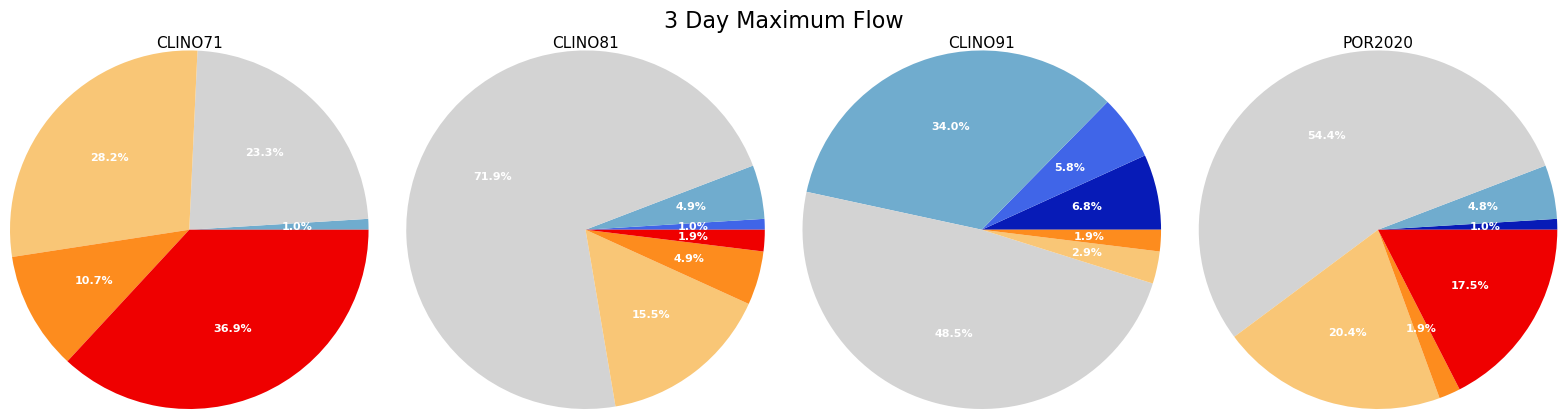

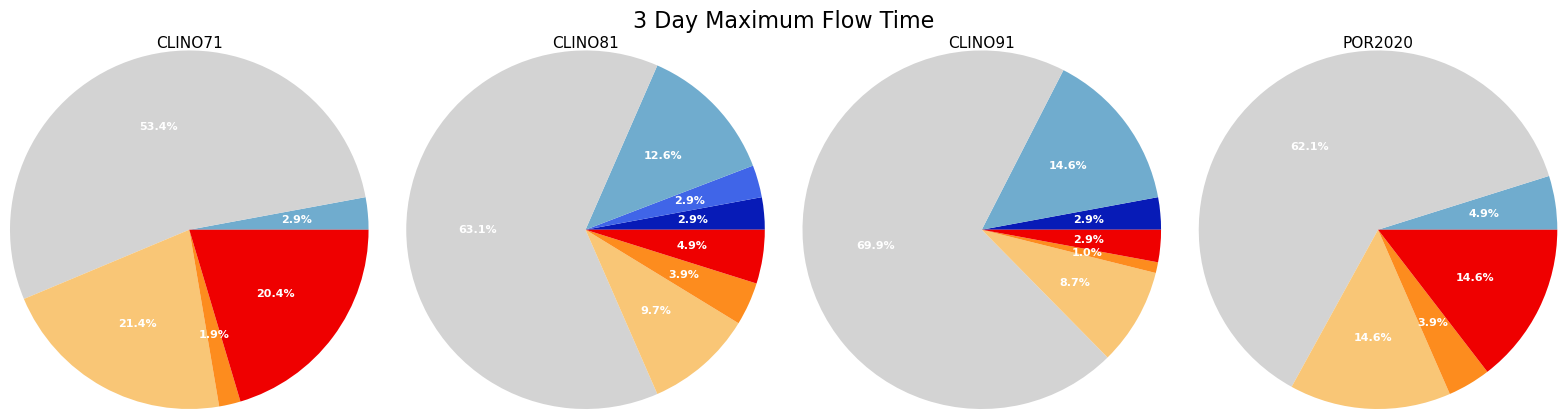

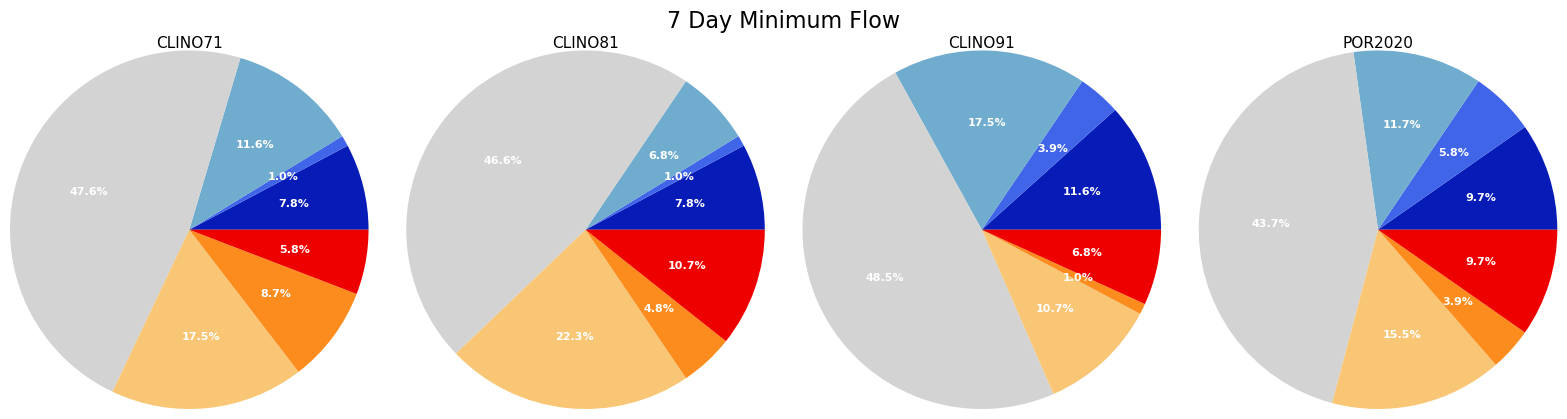

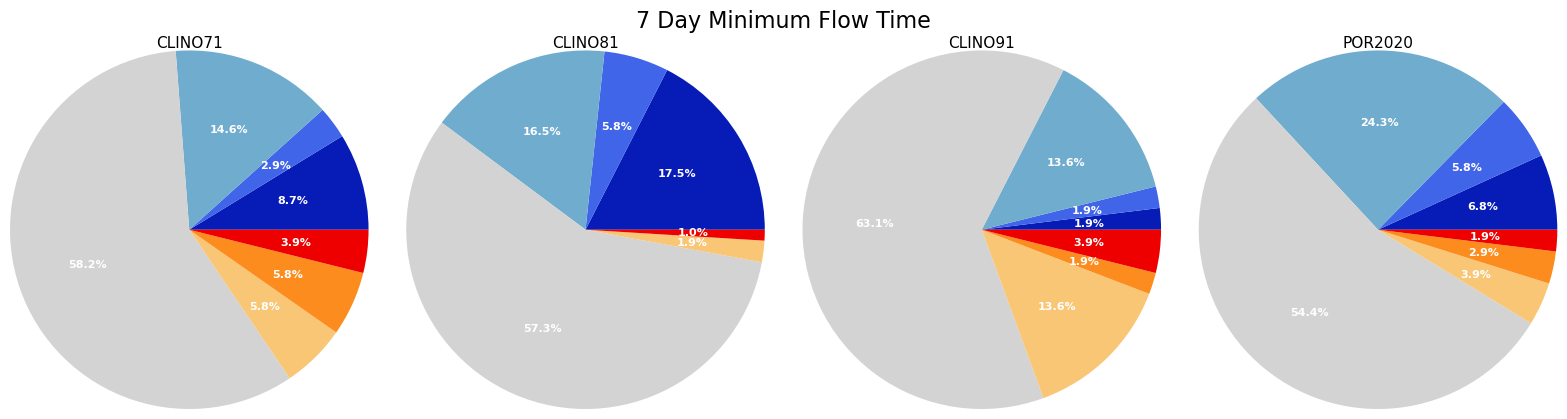

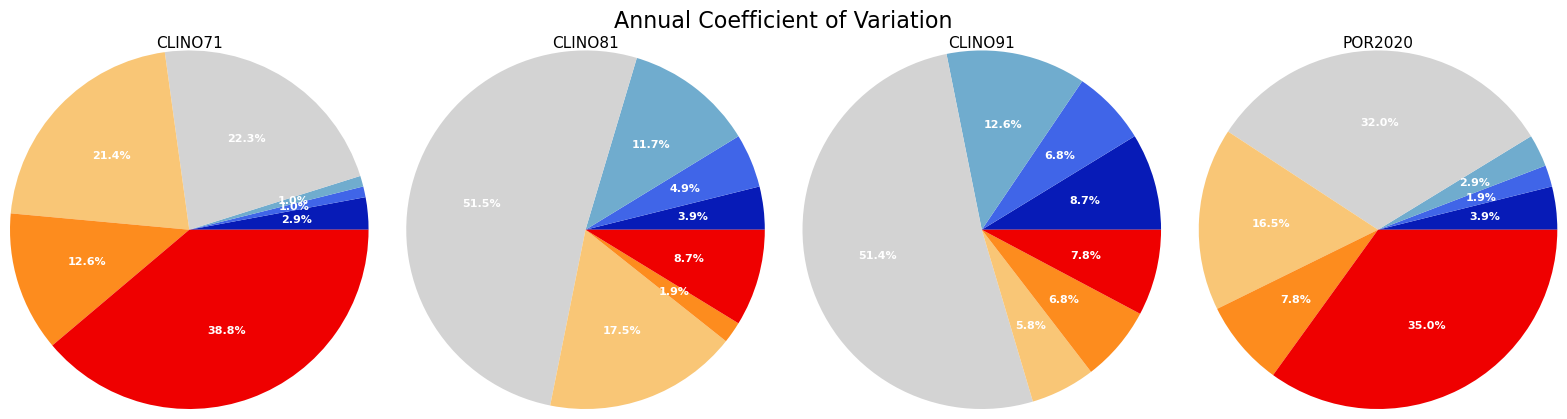

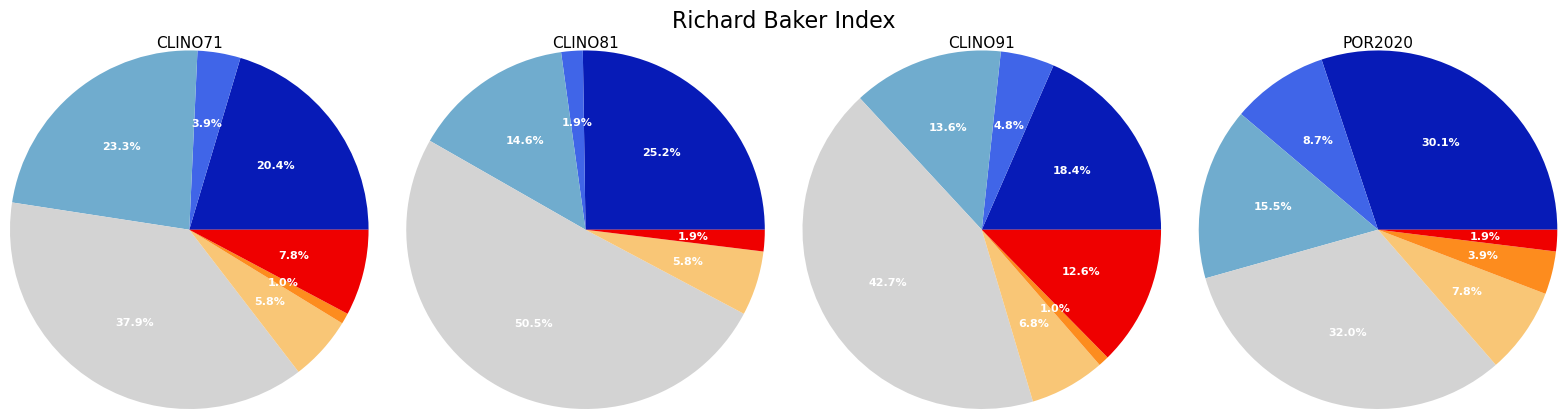

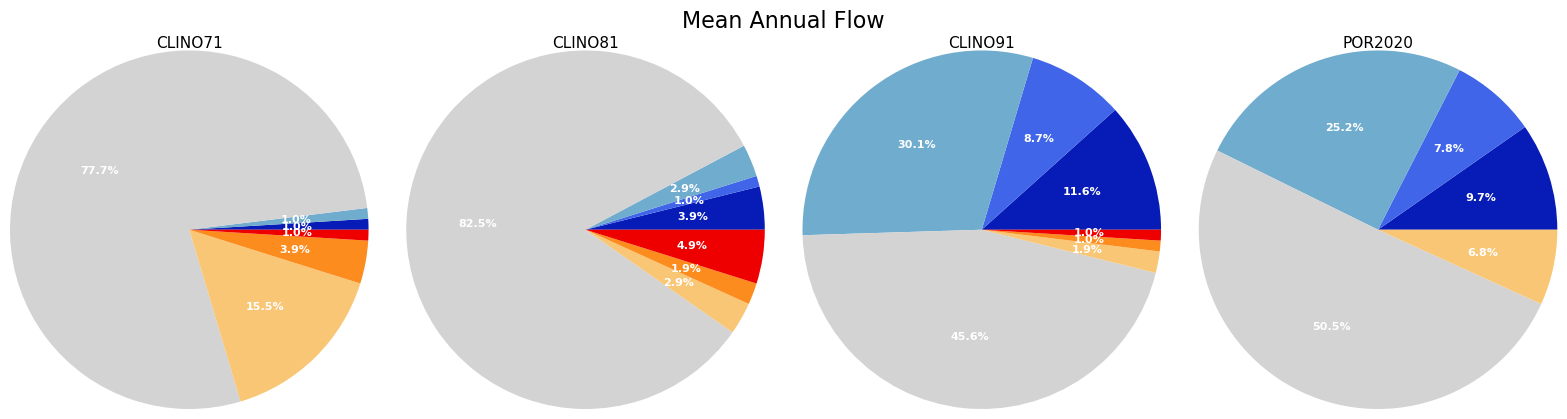

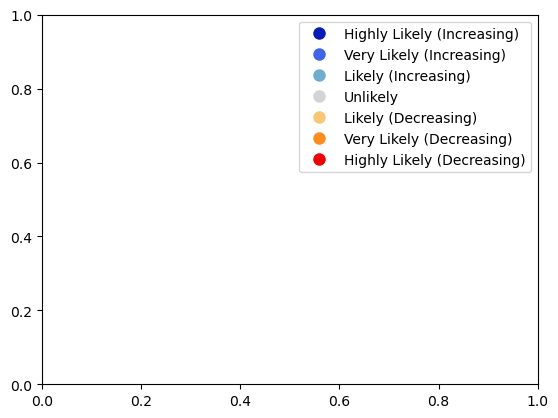

In [3]:
# Combine all data into a list of DataFrames
all_data = [
    data_3_day_max_flow,
    data_3_day_max_flow_time,
    data_7_day_min_flow,
    data_7_day_min_flow_time,
    data_annual_coefficient_of_variation,
    data_richard_baker_index,
    data_mean_annual_discharge
]

titles = [
    "3 Day Maximum Flow",
    "3 Day Maximum Flow Time",
    "7 Day Minimum Flow",
    "7 Day Minimum Flow Time",
    "Annual Coefficient of Variation", 
    "Richard Baker Index",
    "Mean Annual Flow"
]

# Define colors for each category
colors = {
    "Highly Likely (Increasing)": '#071BB7',
    "Very Likely (Increasing)": '#4065E8',
    "Likely (Increasing)": '#70ACCE',
    "Unlikely": '#d3d3d3',
    "Likely (Decreasing)": '#F9C676',
    "Very Likely (Decreasing)": '#FD8C1E',
    "Highly Likely (Decreasing)": '#EF0000',
}

for i, data in enumerate(all_data):
    df = pd.DataFrame(data)
    group_title = titles[i]
    
    # Create a new figure for each group
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes = axes.flatten()

    for j, col in enumerate(df.columns[1:]):
        ax = axes[j]
        ax.pie(
            df[col],
#             autopct='%1.1f%%',
            autopct=lambda p: f'{p:.1f}%' if p > 0.5 else '', 
            colors=[colors[key] for key in df["Significance and Trend Direction"]],
            textprops=dict(color="w", fontsize=8, fontweight='bold'),
            radius=1.45
        )
        ax.set_title(f"{col}", fontsize=11, pad=20)  # Move the title of each pie chart to the top

    # Add the title of the group to the center of the figure
    fig.suptitle(group_title, fontsize=16, fontweight='normal')

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    
    plt.tight_layout()
    plt.show()  # Display the figure

    # Optionally, save the figure to a file
    fig.savefig(f"group_{i}.png", dpi=600,bbox_inches='tight')



# Add a legend outside the plots
plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()],
    labels=colors.keys(),
#     loc='center left',
#     bbox_to_anchor=(1.05, 0.5),
    fontsize=10
)

# plt.tight_layout()
# plt.show()


In [4]:
import os
from PIL import Image


folder_path = r'C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Pie Charts\Piechart_CLINO'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Sort the image files based on their names
image_files.sort()

# Initialize an empty list to store loaded and trimmed images
loaded_images = []

# Load each image with a name like "figure_1", "figure_2", etc.
for i, image_file in enumerate(image_files, start=1):
    image_path = os.path.join(folder_path, image_file)
    
    try:
        # Open the image
        img = Image.open(image_path)
        
        # Trim white space around the image
        img = img.crop(img.getbbox())
        
        # Append the trimmed image to the list
        loaded_images.append(img)
        
        # Assign a name like "figure_1", "figure_2", etc.
        figure_name = f'figure_{i}'
        
        # You can use the 'figure_name' to refer to the loaded image in your code
        print(f"Loaded and trimmed image '{image_file}' as '{figure_name}'")
        
    except Exception as e:
        print(f"Error loading image '{image_file}': {e}")

# Determine the total height needed for concatenation
total_height = sum(img.size[1] for img in loaded_images)

# Create a new image with the width of the first image and the total height
concatenated_image = Image.new('RGB', (loaded_images[0].size[0], total_height))

# Paste each trimmed image vertically in the new image
current_height = 0
for img in loaded_images:
    concatenated_image.paste(img, (0, current_height))
    current_height += img.size[1]

# concatenated_image.show()
save_path =  r"C:\Users\TIWARIDI\OneDrive - Government of Ontario\Documents\WSCdata\SOBR_FinalStations\ResultTable\Pie Charts\CombinedPie_percentageCLINO.jpg"
concatenated_image.save(save_path)


Loaded and trimmed image 'group_00.png' as 'figure_1'
Loaded and trimmed image 'group_01.png' as 'figure_2'
Loaded and trimmed image 'group_1.png' as 'figure_3'
Loaded and trimmed image 'group_2.png' as 'figure_4'
Loaded and trimmed image 'group_3.png' as 'figure_5'
Loaded and trimmed image 'group_4.png' as 'figure_6'
Loaded and trimmed image 'group_5.png' as 'figure_7'
Loaded and trimmed image 'group_6.png' as 'figure_8'


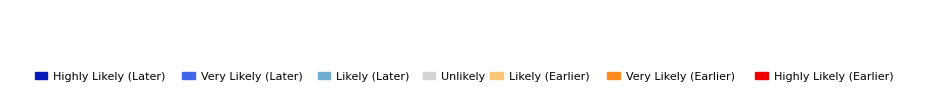

In [54]:
import matplotlib.pyplot as plt

# Define colors and labels
colors = {
    "Highly Likely (Later)": '#071BB7',
    "Very Likely (Later)": '#4065E8',
    "Likely (Later)": '#70ACCE',
    "Unlikely": '#d3d3d3',
    "Likely (Earlier)": '#F9C676',
    "Very Likely (Earlier)": '#FD8C1E',
    "Highly Likely (Earlier)": '#EF0000',
}

# Create figure
fig, ax = plt.subplots(figsize=(12, 1))  # Adjust width to fit legend properly
ax.axis("off")  # Hide axes

# Define fixed spacing
x_start = 0  # Initial X position
y_box = 0.05  # Y position of boxes
y_text = 0.065  # Y position of text
box_size = 0.05  # Box size
text_padding = 0.1  # Padding between boxes and text

# Add legend elements with dynamic spacing
x_position = x_start
for label, color in colors.items():
    # Calculate the width of the label to adjust spacing
    label_width = len(label) * 0.05  # Simple multiplier to estimate label width
    ax.add_patch(plt.Rectangle((x_position, y_box), 0.1, box_size, color=color))
    ax.text(x_position + box_size + text_padding, y_text, label, verticalalignment='center', fontsize=8)
    
    # Update the x_position for the next element
    x_position += box_size + text_padding + label_width

# Adjust plot limits to fit all elements
plt.xlim(-0.2, x_position + 0.2)
plt.ylim(0, 0.5)

plt.savefig("legend_image.png", dpi=600, bbox_inches='tight')

# Show the legend
plt.show()

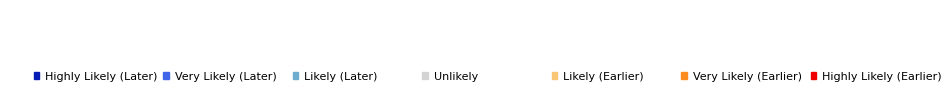

In [43]:
import matplotlib.pyplot as plt

# Define colors and labels
colors = {
    "Highly Likely (Later)": '#071BB7',
    "Very Likely (Later)": '#4065E8',
    "Likely (Later)": '#70ACCE',
    "Unlikely": '#d3d3d3',
    "Likely (Earlier)": '#F9C676',
    "Very Likely (Earlier)": '#FD8C1E',
    "Highly Likely (Earlier)": '#EF0000',
}

# Create figure
fig, ax = plt.subplots(figsize=(12, 1))  # Adjust width to fit legend properly
ax.axis("off")  # Hide axes

# Define fixed spacing
x_start = 0  # Initial X position
y_box = 0.05  # Y position of boxes
y_text = 0.065  # Y position of text
box_size = 0.05  # Box size
spacing = 1.1  # Fixed horizontal spacing between items

# Add legend elements
for i, (label, color) in enumerate(colors.items()):
    ax.add_patch(plt.Rectangle((x_start + i * spacing, y_box), box_size, box_size, color=color))
    ax.text(x_start + i * spacing + 0.1, y_text, label, verticalalignment='center', fontsize=8)

# Adjust plot limits to fit all elements
plt.xlim(-0.2, len(colors) * spacing)
plt.ylim(0, 0.5)

# Show the legend
plt.show()
